In [2]:
import os

os.chdir('../..')

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import utils
from sklearn.metrics import *

In [4]:
models = ['AttNet+Baseline+lead1', 'ResNet+Baseline+lead1', 
          'VGGNet+lead1', 'AlexNet+lead1', 'LeNet+lead1', 
          'NewWavelet+NN+lead1', 'Wavelet+NN+lead1']
modelnames = ['AttNet', 'ResNet', 'VGGNet', 'AlexNet', 'LeNet', 'HCF', 'Wavelet']

In [5]:
y_test_preds = []

for model in models:
    file = f"C://Mohit/Imperial/fyp-hearts/output/exp4/models/{model}/y_test_pred.npy"
    y_pred = np.load(file, allow_pickle=True)
    y_test_preds += [y_pred]

y_test = np.load(f"C://Mohit/Imperial/fyp-hearts/output/exp4/data/y_test.npy", allow_pickle=True)

In [6]:
results = pd.DataFrame(index=models)
results['AUC'] = 0
results['F1 Score'] = 0
for i in range(1,11):
    results[f'DUS (beta={i/10})'] = 0

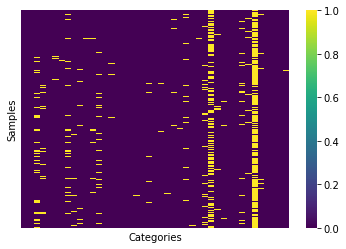

Text(33.0, 0.5, 'Samples')

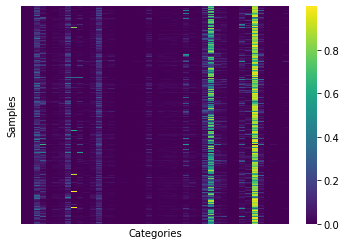

In [7]:
ax = sns.heatmap(y_test, cmap="viridis")
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('Categories')
ax.set_ylabel('Samples')
plt.show()

ax = sns.heatmap(y_pred, cmap="viridis")
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('Categories')
ax.set_ylabel('Samples')

In [8]:
multilabel_confusion_matrix(y_test, (y_pred).astype(int))

array([[[2147,    0],
        [   1,    0]],

       [[2146,    0],
        [   2,    0]],

       [[1826,    0],
        [ 322,    0]],

       [[1996,    0],
        [ 152,    0]],

       [[2141,    0],
        [   7,    0]],

       [[2121,    0],
        [  27,    0]],

       [[2113,    0],
        [  35,    0]],

       [[1914,    0],
        [ 234,    0]],

       [[2094,    0],
        [  54,    0]],

       [[2094,    0],
        [  54,    0]],

       [[2139,    0],
        [   9,    0]],

       [[2100,    0],
        [  48,    0]],

       [[1881,    0],
        [ 267,    0]],

       [[2134,    0],
        [  14,    0]],

       [[2126,    0],
        [  22,    0]],

       [[2146,    0],
        [   2,    0]],

       [[2146,    0],
        [   2,    0]],

       [[2146,    0],
        [   2,    0]],

       [[2143,    0],
        [   5,    0]],

       [[2145,    0],
        [   3,    0]],

       [[2082,    0],
        [  66,    0]],

       [[2144,    0],
        [   

<AxesSubplot:>

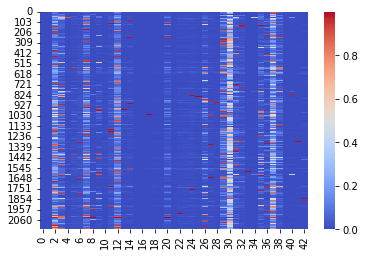

In [9]:
sns.heatmap(np.abs(y_test - y_pred), cmap="coolwarm")

In [10]:
def dus_score(true, preds, beta=0.5):
    nums = true.shape[1]
    duses = []
    for i in range(nums):
        predsx = preds[:,i]
        y_testx = true[:,i]
        
        tn = confusion_matrix(y_testx, (predsx>0.5).astype(int))[0][0]
        tp = confusion_matrix(y_testx, (predsx>0.5).astype(int))[1][1]
        fp = confusion_matrix(y_testx, (predsx>0.5).astype(int))[0][1]
        fn = confusion_matrix(y_testx, (predsx>0.5).astype(int))[1][0]

        # dus = (1-beta)*roc_auc_score(y_testx, predsx) + beta*((tp+tn+fp)/(tp+tn+fp+fn))
        dus = (1-beta)*roc_auc_score(y_testx, predsx) + beta*(0.5 + 0.5*(tn/(tn+fn)))
        duses += [dus]
    return np.array(duses).mean()

In [11]:
for i in range(len(models)):
    model = models[i]
    y_pred = y_test_preds[i]
    results.loc[model, 'AUC'] = roc_auc_score(y_test, y_pred)
    results.loc[model, 'F1 Score'] = f1_score(y_test, (y_pred>0.5).astype(int), average='macro')
    # results.loc[model, '1-Acc'] = 1 - accuracy_score(y_test, (y_pred>0.5).astype(int))
    # results.loc[model, 'Sensitivity'] = 
    
    for i in range(1,11):
        results.loc[model, f'DUS (beta={i/10})'] = dus_score(y_test, y_pred)
results

,AUC,F1 Score,DUS (beta=0.1),DUS (beta=0.2),DUS (beta=0.3),DUS (beta=0.4),DUS (beta=0.5),DUS (beta=0.6),DUS (beta=0.7),DUS (beta=0.8),DUS (beta=0.9),DUS (beta=1.0)
AttNet+Baseline+lead1,0.853369,0.155111,0.920552,0.920552,0.920552,0.920552,0.920552,0.920552,0.920552,0.920552,0.920552,0.920552
ResNet+Baseline+lead1,0.844847,0.145272,0.914871,0.914871,0.914871,0.914871,0.914871,0.914871,0.914871,0.914871,0.914871,0.914871
VGGNet+lead1,0.818811,0.087640,0.902248,0.902248,0.902248,0.902248,0.902248,0.902248,0.902248,0.902248,0.902248,0.902248
AlexNet+lead1,0.839154,0.125766,0.912868,0.912868,0.912868,0.912868,0.912868,0.912868,0.912868,0.912868,0.912868,0.912868
LeNet+lead1,0.825018,0.124552,0.904547,0.904547,0.904547,0.904547,0.904547,0.904547,0.904547,0.904547,0.904547,0.904547
NewWavelet+NN+lead1,0.766244,0.110654,0.875006,0.875006,0.875006,0.875006,0.875006,0.875006,0.875006,0.875006,0.875006,0.875006
Wavelet+NN+lead1,0.734562,0.065084,0.858917,0.858917,0.858917,0.858917,0.858917,0.858917,0.858917,0.858917,0.858917,0.858917


In [12]:
results['Params'] = [19111, 82475, 4036971, 1215911, 5195, 14891, 14891]

<AxesSubplot:>

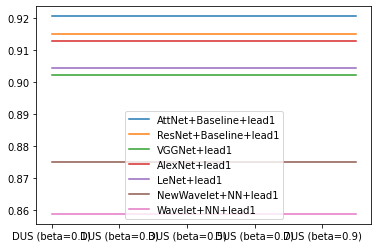

In [13]:
dus_df = results.filter(like='DUS')
dus_df.T.plot()

In [14]:
preds = y_test_preds[-1]
true = y_test
duses= []
for i in range(43):
    predsx = preds[:,i]
    y_testx = true[:,i]

    tn = confusion_matrix(y_testx, (predsx>0.5).astype(int))[0][0]
    tp = confusion_matrix(y_testx, (predsx>0.5).astype(int))[1][1]
    fp = confusion_matrix(y_testx, (predsx>0.5).astype(int))[0][1]
    fn = confusion_matrix(y_testx, (predsx>0.5).astype(int))[1][0]

    beta=1
    # dus = (1-beta)*roc_auc_score(y_testx, predsx) + beta*((tp+tn+fp)/(tp+tn+fp+fn))
    dus = (1-beta)*roc_auc_score(y_testx, predsx) + beta*(0.5 + (tn/(tn+fn)))
    duses += [dus]

In [15]:
for i in range(len(models)):
    model = models[i]
    y_pred = y_test_preds[i]
    results.loc[model, 'AUC'] = roc_auc_score(y_test, y_pred)

AttNet
ResNet
VGGNet
AlexNet
LeNet
HCF
Wavelet


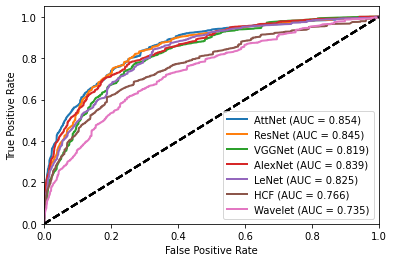

In [16]:
from itertools import cycle

for i in range(len(models)):
    model = models[i]
    modelname = modelnames[i]
    print(modelname)
    y_pred = y_test_preds[i]
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(43):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute macro-average ROC curve and ROC area
    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(43)]))

    # Then interpolate all ROC curves at these points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(43):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= 43

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    # plt.figure()
    lw = 2
    colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])

    plt.plot(fpr["macro"], tpr["macro"],
            label=modelname+f' (AUC = {roc_auc["macro"]:.3f})', linewidth=2)

    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    # plt.title('Multi-label ROC and Macro AUC')
    plt.legend(loc="lower right")

plt.show()


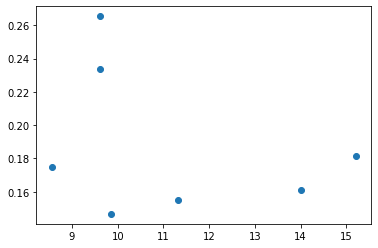

In [17]:
plt.scatter(x=np.log(results['Params']), y=1-results['AUC'])

In [18]:
import pickle
with open(r"C:\Mohit\Imperial\fyp-hearts\output\exp4\data\mlb.pkl", 'rb') as f:
    mlb = pickle.load(f).classes_

'SINUS' = 'SR'
'AFIB' = 'AFIB'
'AFL' = 'AFLT'
'SBRAD' = 'SBRAD'
'SVTA' ='SVTAC'

In [19]:
mlb

array(['2AVB', '3AVB', 'ABQRS', 'AFIB', 'AFLT', 'ALMI', 'AMI', 'ASMI',
       'CLBBB', 'CRBBB', 'EL', 'ILMI', 'IMI', 'INJAL', 'INJAS', 'INJIL',
       'INJIN', 'INJLA', 'IPLMI', 'IPMI', 'ISCAL', 'ISCAN', 'ISCAS',
       'ISCIL', 'ISCIN', 'ISCLA', 'ISC_', 'LMI', 'LNGQT', 'NDT', 'NORM',
       'NST_', 'PAC', 'PMI', 'PSVT', 'PVC', 'SBRAD', 'SR', 'STD_', 'STE_',
       'SVTAC', 'TAB_', 'WPW'], dtype=object)

In [20]:
chosen_names = np.array(['AFLT', 'AFIB', 'SR', 'SVTAC', 'SBRAD'])

chosen_idxs = np.flatnonzero(np.isin(mlb, chosen_names))

In [21]:
roc_auc_score(y_test[:, chosen_idxs], y_pred[:,chosen_idxs]), f1_score(y_test[:, chosen_idxs], (y_test_preds[0][:,chosen_idxs]>0.5).astype(int), average='macro')

(0.8567846324872918, 0.5045519714772289)

In [22]:
mlb.index('AFLT')

AttributeError: 'numpy.ndarray' object has no attribute 'index'

In [ ]:
comparison_idxs = [3, 4, ]

In [ ]:
def dus_score(true, preds, beta=0.5, threshold=0.5):
    nums = true.shape[1]
    duses = []
    for i in range(nums):
        predsx = preds[:,i]
        y_testx = true[:,i]
        
        tn = confusion_matrix(y_testx, (predsx>threshold).astype(int))[0][0]
        tp = confusion_matrix(y_testx, (predsx>threshold).astype(int))[1][1]
        fp = confusion_matrix(y_testx, (predsx>threshold).astype(int))[0][1]
        fn = confusion_matrix(y_testx, (predsx>threshold).astype(int))[1][0]

        # dus = (1-beta)*roc_auc_score(y_testx, predsx) + beta*((tp+tn+fp)/(tp+tn+fp+fn))
        dus = (1-beta)*roc_auc_score(y_testx, predsx) + beta*(0.5 + 0.5*(tn/(tn+fn)))
        duses += [dus]
    return np.array(duses).mean()

In [ ]:


dus_thresh = pd.DataFrame(index=modelnames)
for i in range(len(models)):
    model = modelnames[i]
    y_pred = y_test_preds[i]
    # dus_thresh.loc[model, 0.05] = dus_score(y_test, y_pred, threshold=0.05)
    for j in range(5,101):
        dus_thresh.loc[model, j/100] = dus_score(y_test, y_pred, threshold=j/100)
        # results.loc[model, '1-Acc'] = 1 - accuracy_score(y_test, (y_pred>0.5).astype(int))
    # results.loc[model, 'Sensitivity'] = 
    
dus_thresh

,0.05,0.06,0.07,0.08,0.09,0.10,0.11,0.12,0.13,0.14,...,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1.00
AttNet,0.924509,0.924395,0.924230,0.924062,0.923909,0.923704,0.923577,0.923464,0.923359,0.923206,...,0.915994,0.915760,0.915475,0.915242,0.915036,0.914769,0.914342,0.913914,0.913777,0.913700
ResNet,0.920070,0.919906,0.919748,0.919684,0.919410,0.919275,0.919101,0.918895,0.918789,0.918649,...,0.909688,0.909608,0.909551,0.909518,0.909492,0.909480,0.909474,0.909466,0.909450,0.909439
VGGNet,0.907489,0.907160,0.906754,0.906273,0.906101,0.905863,0.905686,0.905509,0.905361,0.905267,...,0.897473,0.897285,0.897062,0.896741,0.896499,0.896437,0.896429,0.896424,0.896422,0.896422
AlexNet,0.917522,0.917264,0.917128,0.916980,0.916792,0.916636,0.916401,0.916175,0.916055,0.915884,...,0.907377,0.907185,0.906983,0.906798,0.906713,0.906667,0.906642,0.906641,0.906633,0.906593
LeNet,0.909854,0.909726,0.909561,0.909232,0.908942,0.908828,0.908687,0.908553,0.908342,0.908157,...,0.900073,0.899936,0.899817,0.899744,0.899666,0.899609,0.899578,0.899567,0.899562,0.899525
HCF,0.880065,0.879762,0.879424,0.879219,0.879135,0.878973,0.878773,0.878637,0.878579,0.878455,...,0.870840,0.870747,0.870636,0.870570,0.870461,0.870389,0.870319,0.870249,0.870195,0.870138
Wavelet,0.864323,0.863549,0.863394,0.863283,0.863240,0.863108,0.862922,0.862777,0.862322,0.862006,...,0.854572,0.854514,0.854480,0.854443,0.854409,0.854367,0.854349,0.854328,0.854317,0.854297


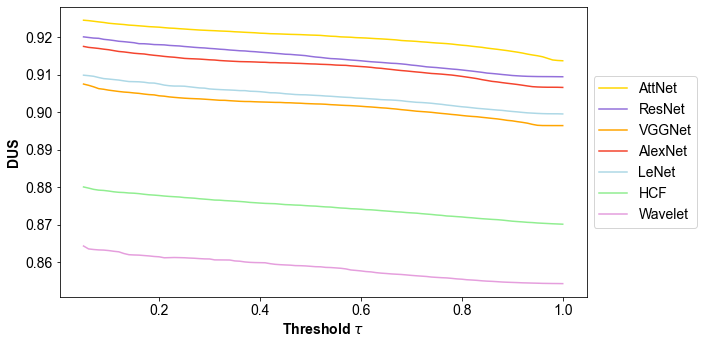

In [ ]:
import matplotlib
matplotlib.rcParams['font.family'] = 'Arial'
matplotlib.rcParams['font.size'] = 14  # Increase font size
# colors = ['#E59EDD', '#90EE90', '#FFA500', '#ADD8E6', '#F4442E', '#9370DB', '#FFD700']
colors = ['#FFD700', '#9370DB', '#FFA500', '#F4442E', '#ADD8E6', '#90EE90', '#E59EDD']

fig, ax = plt.subplots(figsize=(10,5))
# ax.plot(dus_thresh.T, label=dus_thresh.columns)
i=0
for column in dus_thresh.T.columns:
    ax.plot(dus_thresh.T[column], label=column, color=colors[i])
    i+=1
ax.set_xlabel(r"Threshold $\tau$", fontweight="bold")
ax.set_ylabel("DUS", fontweight="bold")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.savefig(r"C:\Users\agarw\OneDrive - Imperial College London\Year 4\Final Year Project\Report Images\dus_thresh.png", dpi=1000, bbox_inches='tight')
plt.tight_layout()

In [ ]:
dus_thresh.T.columns

Index(['AttNet', 'ResNet', 'VGGNet', 'AlexNet', 'LeNet', 'HCF', 'Wavelet'], dtype='object')

[0.9266843132146105, 0.9224233954189798, 0.9094054801324631, 0.9195770452733552, 0.9125089042287916, 0.8831221565713788, 0.8672810399346389]


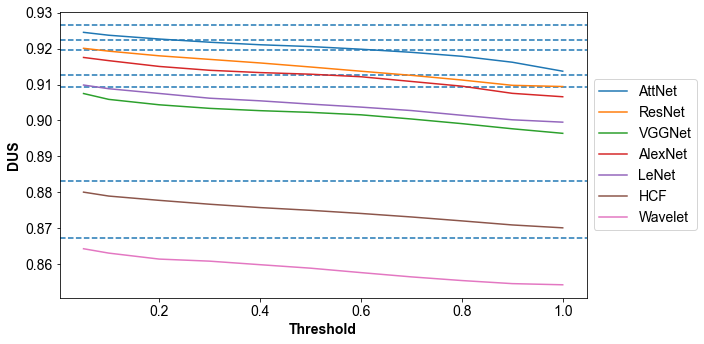

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))

vals = results['AUC']*.5 + .5
vals = list(vals)
print(vals)
for val in vals:
    ax.axhline(val, linestyle='--')


for column in dus_thresh.T.columns:
    ax.plot(dus_thresh.T[column], label=column)
ax.set_xlabel("Threshold", fontweight="bold")
ax.set_ylabel("DUS", fontweight="bold")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
# plt.savefig(r"C:\Users\agarw\OneDrive - Imperial College London\Year 4\Final Year Project\Report Images\dus_thresh.png", dpi=1000, bbox_inches='tight')
plt.tight_layout()


In [ ]:
f1_thresh = pd.DataFrame(index=modelnames)
for i in range(len(models)):
    model = modelnames[i]
    y_pred = y_test_preds[i]
    for j in range(1,11):
        f1_thresh.loc[model, f'{j/10}'] = recall_score(y_test, (y_pred>j/10).astype(int), average="macro")
        # results.loc[model, '1-Acc'] = 1 - accuracy_score(y_test, (y_pred>0.5).astype(int))
    # results.loc[model, 'Sensitivity'] = 
    
f1_thresh

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
AttNet,0.346990,0.251118,0.189460,0.160823,0.140720,0.124376,0.106994,0.091786,0.061719,0.0
ResNet,0.318687,0.246431,0.194665,0.164884,0.135141,0.116575,0.089747,0.062535,0.020403,0.0
VGGNet,0.271832,0.178446,0.123494,0.096690,0.083007,0.070772,0.051226,0.035134,0.020872,0.0
AlexNet,0.334372,0.210784,0.154577,0.126332,0.116091,0.104710,0.084846,0.059240,0.031699,0.0
LeNet,0.292575,0.210864,0.158313,0.131437,0.107080,0.090347,0.076801,0.052187,0.027446,0.0
HCF,0.289338,0.208658,0.155334,0.113339,0.096261,0.073670,0.060243,0.045142,0.028335,0.0
Wavelet,0.221609,0.130387,0.093950,0.076612,0.062244,0.055094,0.044072,0.031301,0.016778,0.0


In [ ]:
results

,AUC,F1 Score,DUS (beta=0.1),DUS (beta=0.2),DUS (beta=0.3),DUS (beta=0.4),DUS (beta=0.5),DUS (beta=0.6),DUS (beta=0.7),DUS (beta=0.8),DUS (beta=0.9),DUS (beta=1.0)
AttNet+Baseline+lead1,0.853369,0.155111,0.927866,0.927866,0.927866,0.927866,0.927866,0.927866,0.927866,0.927866,0.927866,0.927866
ResNet+Baseline+lead1,0.844847,0.145272,0.954441,0.954441,0.954441,0.954441,0.954441,0.954441,0.954441,0.954441,0.954441,0.954441
VGGNet+lead1,0.818811,0.087640,0.865366,0.865366,0.865366,0.865366,0.865366,0.865366,0.865366,0.865366,0.865366,0.865366
AlexNet+lead1,0.839154,0.125766,0.858123,0.858123,0.858123,0.858123,0.858123,0.858123,0.858123,0.858123,0.858123,0.858123
LeNet+lead1,0.825018,0.124552,0.945124,0.945124,0.945124,0.945124,0.945124,0.945124,0.945124,0.945124,0.945124,0.945124
NewWavelet+NN+lead1,0.766244,0.110654,0.769279,0.769279,0.769279,0.769279,0.769279,0.769279,0.769279,0.769279,0.769279,0.769279
Wavelet+NN+lead1,0.734562,0.065084,0.881516,0.881516,0.881516,0.881516,0.881516,0.881516,0.881516,0.881516,0.881516,0.881516


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
matplotlib.rcParams['font.family'] = 'Arial'
matplotlib.rcParams['font.size'] = 14  # Increase font size
# Data
data = {
    "Base Model": ["Wavelet", "HCF", "LeNet", "AlexNet", "VGGNet", "ResNet", "AttNet"],
    "AUC": [0.742, 0.746, 0.825, 0.839, 0.819, 0.845, 0.853],
    "AUC CI": [0.024, 0.025, 0.013, 0.011, 0.014, 0.014, 0.015],
    "DUS (beta=0.5)": [0.769, 0.882, 0.905, 0.912, 0.902, 0.915, 0.919],
    "DUS CI": [0.010, 0.012, 0.005, 0.006, 0.006, 0.005, 0.006]
}
colors = ['#E59EDD', '#90EE90', '#FFA500', '#ADD8E6', '#F4442E', '#9370DB', '#FFD700']

df = pd.DataFrame(data)
df.sort_values(by="DUS (beta=0.5)", ascending=True, inplace=True)

# Plotting
# fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Barplot for AUC
plt.figure(figsize=(7,6))
sns.barplot(x="AUC", y="Base Model", data=df, ci=None, palette=colors)
plt.errorbar(df["AUC"], df["Base Model"], xerr=df["AUC CI"], fmt='none', c='black', capsize=5)
plt.xlabel("AUC", fontweight="bold")
plt.xlim(0.7,1)
plt.ylabel("Base Model", fontweight="bold")
plt.tight_layout()
plt.savefig(r"C:\Users\agarw\OneDrive - Imperial College London\Year 4\Final Year Project\Report Images\base_auc.png", dpi=1000, bbox_inches='tight')
plt.close()

# Barplot for DUS (beta=0.5)
plt.figure(figsize=(7,6))
sns.barplot(x="DUS (beta=0.5)", y="Base Model", data=df, ci=None,palette=colors)
plt.errorbar(df["DUS (beta=0.5)"], df["Base Model"], xerr=df["DUS CI"], fmt='none', c='black', capsize=5)
plt.xlabel("DUS ($\\beta=0.5$)", fontweight="bold")
plt.xlim(0.7,1)
plt.ylabel("Base Model", fontweight="bold")
plt.tight_layout()
plt.savefig(r"C:\Users\agarw\OneDrive - Imperial College London\Year 4\Final Year Project\Report Images\base_dus.png", dpi=1000, bbox_inches='tight')
plt.close()


C:\Users\agarw\AppData\Local\Temp\ipykernel_40728\2215310152.py:24: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="AUC", y="Base Model", data=df, ci=None, palette=colors)
C:\Users\agarw\AppData\Local\Temp\ipykernel_40728\2215310152.py:35: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="DUS (beta=0.5)", y="Base Model", data=df, ci=None,palette=colors)


In [ ]:
roc_auc_score(y_test, y_test_preds[5], average='weighted')

0.8009470205112731

In [ ]:
conf_matrix = confusion_matrix(y_test.ravel(), (y_test_preds[-2].ravel()>0.5).astype(int))
conf_matrix

array([[86880,   687],
       [ 2251,  2546]], dtype=int64)

In [ ]:
conf_matrix = confusion_matrix(y_test.ravel(), (y_test_preds[-1].ravel()>0.5).astype(int))
conf_matrix

array([[86841,   726],
       [ 2359,  2438]], dtype=int64)

In [ ]:
(0.766-0.742)/.742

0.03234501347708898

In [ ]:
(0.875-0.769)/0.769

0.13784135240572168

In [ ]:
y_train = np.load(f"C://Mohit/Imperial/fyp-hearts/output/exp4/data/y_train.npy", allow_pickle=True)

In [ ]:
counts = np.sum(y_train == 1,axis=0)

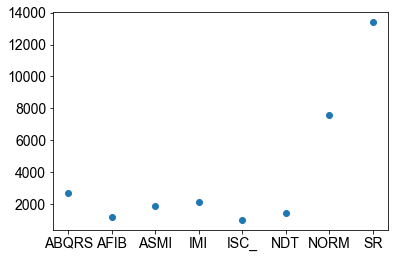

In [ ]:
plt.scatter(x=mlb[counts>1000], y=counts[counts>1000])

In [ ]:
aucs = []
for i in range(43):
    aucs += [roc_auc_score(y_test[:,i], y_test_preds[0][:,i])]

In [ ]:
counts<2000

array([ True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True])

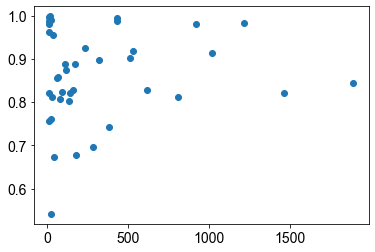

In [ ]:
plt.scatter(counts[counts<2000], np.array(aucs)[counts<2000])

In [ ]:
counts[counts<2000], aucs[counts<2000

TypeError: only integer scalar arrays can be converted to a scalar index

In [23]:
np.array(aucs)[counts<2000]

NameError: name 'aucs' is not defined

In [ ]:
auc_values = []

# Calculate AUC for each category and each model
for model_preds in y_test_preds:
    model_auc = []
    for i in range(y_test.shape[1]):
        auc = roc_auc_score(y_test[:, i], model_preds[:, i])
        model_auc.append(auc)
    auc_values.append(model_auc)

# Convert to numpy array for easier handling
auc_values = np.array(auc_values)

In [24]:
def dus_(true, preds, beta=0.5, threshold=0.5):
    
    duses = []

    predsx = preds
    y_testx = true
    
    tn = confusion_matrix(y_testx, (predsx>threshold).astype(int))[0][0]
    tp = confusion_matrix(y_testx, (predsx>threshold).astype(int))[1][1]
    fp = confusion_matrix(y_testx, (predsx>threshold).astype(int))[0][1]
    fn = confusion_matrix(y_testx, (predsx>threshold).astype(int))[1][0]

    # dus = (1-beta)*roc_auc_score(y_testx, predsx) + beta*((tp+tn+fp)/(tp+tn+fp+fn))
    dus = (1-beta)*roc_auc_score(y_testx, predsx) + beta*(0.5 + 0.5*(tn/(tn+fn)))
    duses += [dus]
    return np.array(duses).mean()

In [25]:
auc_values = []

# Calculate AUC for each category and each model
for model_preds in y_test_preds:
    model_auc = []
    for i in range(y_test.shape[1]):
        auc = dus_(y_test[:, i], model_preds[:, i])
        model_auc.append(auc)
    auc_values.append(model_auc)

# Convert to numpy array for easier handling
auc_values = np.array(auc_values)

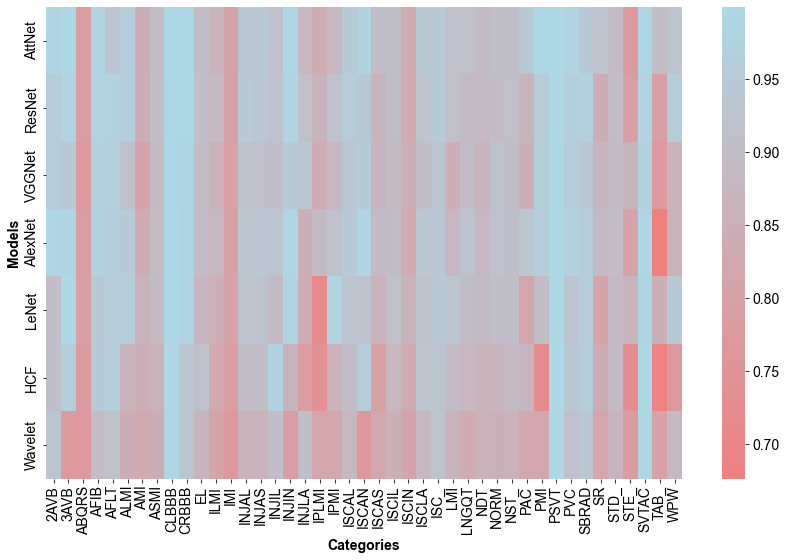

In [28]:
from matplotlib.colors import LinearSegmentedColormap
import matplotlib

matplotlib.rcParams['font.family'] = 'Arial'
matplotlib.rcParams['font.size'] = 14  # Increase font size
colors = ["#F08080", "#ADD8E6"] #F08080 90EE90
cmap_name = "custom_cmap"
cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=100)

plt.figure(figsize=(12, 8))
sns.heatmap(auc_values, cmap=cmap, xticklabels=mlb, yticklabels=modelnames)
plt.xlabel('Categories', fontweight="bold")
plt.ylabel('Models', fontweight="bold")
# plt.title('AUC Values for Each Category and Model')
plt.tight_layout()
plt.savefig(r"C:\Users\agarw\OneDrive - Imperial College London\Year 4\Final Year Project\Report Images\heatmap.png", dpi=1000, bbox_inches='tight')
plt.show()

In [ ]:
auc_values = []

# Calculate AUC for each category and each model
for model_preds in y_test_preds:
    model_auc = []
    for i in range(y_test.shape[1]):
        auc = dus_(y_test[:, i], model_preds[:, i])
        model_auc.append(auc)
    auc_values.append(model_auc)

# Convert to numpy array for easier handling
auc_values = np.array(auc_values)

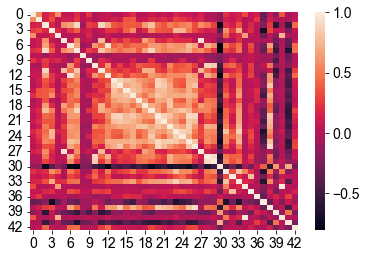

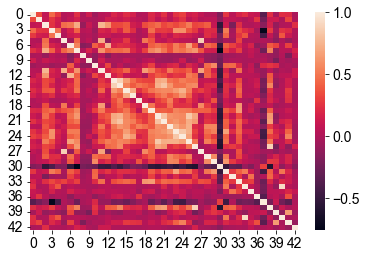

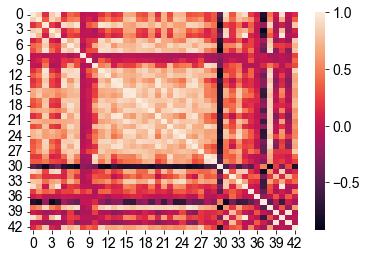

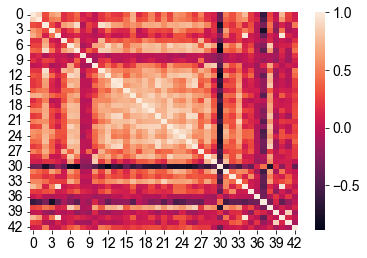

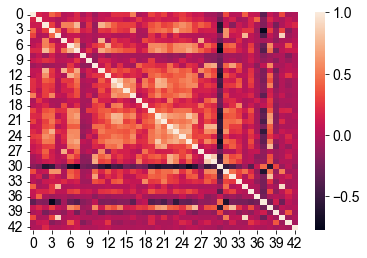

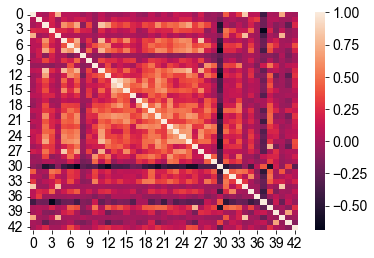

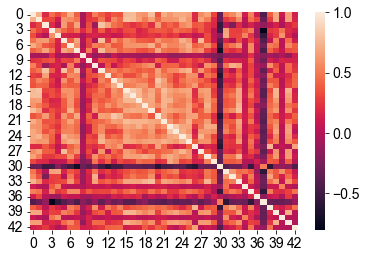

In [ ]:
for i in range(7): 
    sns.heatmap(pd.DataFrame(np.array(y_test_preds)[i]).corr())
    plt.show()

In [ ]:
np.array(y_test_preds).shape

(7, 2148, 43)

In [ ]:
np.array(y_test_preds).shape

(7, 2148, 43)

In [ ]:
np.array(avg_category_corrs).mean()

0.12914258268177742

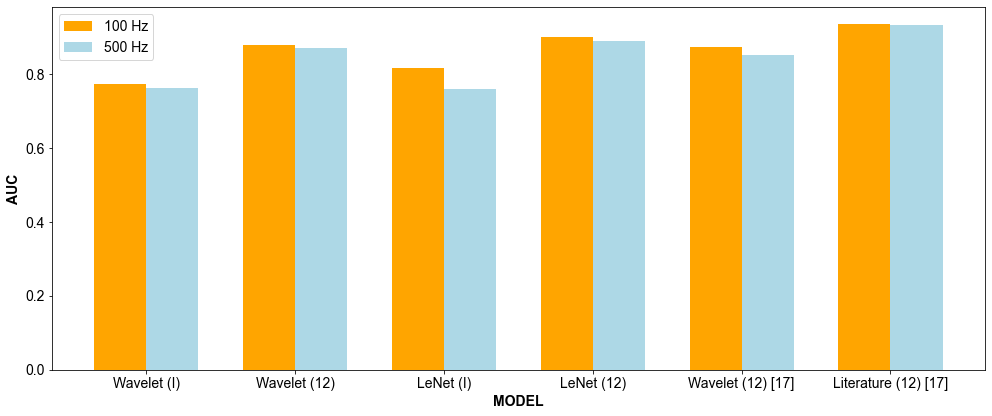

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
matplotlib.rcParams['font.family'] = 'Arial'
matplotlib.rcParams['font.size'] = 14  # Increase font size

# Data
models = ['Wavelet (I)', 'Wavelet (12)', 'LeNet (I)', 'LeNet (12)', 'Wavelet (12) [17]', 'Literature (12) [17]']
values_100 = [0.772, 0.877, 0.817, 0.901, 0.874, 0.934]
values_500 = [0.763, 0.870, 0.760, 0.889, 0.852, 0.931]

colors = ['#FFD700', '#9370DB', '#FFA500', '#F4442E', '#ADD8E6', '#90EE90', '#E59EDD']

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(14, 6))

# Set the bar width
bar_width = 0.35

# Set the x-axis positions for the bars
x = np.arange(len(models))

# Plot the bars
rects1 = ax.bar(x - bar_width/2, values_100, bar_width, label='100 Hz', color=colors[2])
rects2 = ax.bar(x + bar_width/2, values_500, bar_width, label='500 Hz', color=colors[4])

# Add labels and title
ax.set_xlabel('MODEL', fontweight="bold")
ax.set_ylabel('AUC', fontweight="bold")
ax.set_xticks(x)
ax.set_xticklabels(models,)
ax.legend()

# # Add value labels on top of the bars
# for rect1, rect2, model in zip(rects1, rects2, models):
#     height1 = rect1.get_height()
#     height2 = rect2.get_height()
    # ax.annotate(f'{height1:.3f}', xy=(rect1.get_x() + rect1.get_width() / 2, height1), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')
    # ax.annotate(f'{height2:.3f}', xy=(rect2.get_x() + rect2.get_width() / 2, height2), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

# Adjust the layout and display the plot
plt.tight_layout()
plt.savefig(r"C:\Users\agarw\OneDrive - Imperial College London\Year 4\Final Year Project\Report Images\freq.png", dpi=1000, bbox_inches='tight')
plt.show()

In [ ]:
import numpy as np
from scipy.stats import pearsonr

corr_matrices = []
for model in np.array(y_test_preds):
    corr_matrix = np.corrcoef(model.T)
    corr_matrices.append(corr_matrix)

avg_corr_matrix = np.mean(corr_matrices, axis=0)
avg_category_corrs = []
for i in range(avg_corr_matrix.shape[0]):
    avg_category_corrs.append(np.mean(np.tril(avg_corr_matrix[i], -1)))

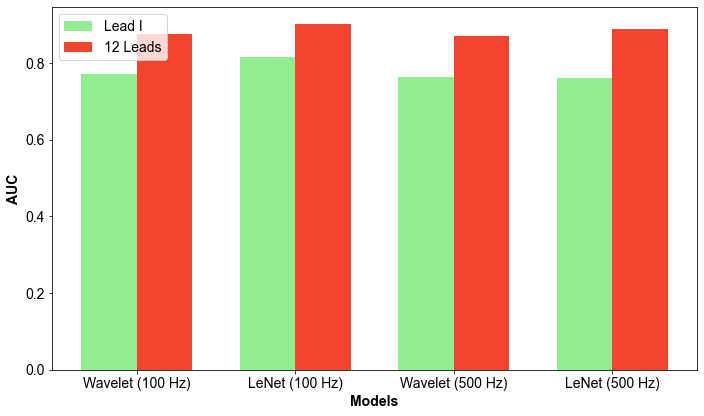

In [ ]:
models = ['Wavelet (100 Hz)', 'LeNet (100 Hz)', 'Wavelet (500 Hz)', 'LeNet (500 Hz)']
values_lead_i = [0.772, 0.817, 0.763, 0.760]
values_12_leads = [0.877, 0.901, 0.870, 0.889]
colors = ['#FFD700', '#9370DB', '#FFA500', '#F4442E', '#ADD8E6', '#90EE90', '#E59EDD']


# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Set the bar width
bar_width = 0.35

# Set the x-axis positions for the bars
x = np.arange(len(models))

# Plot the bars
rects1 = ax.bar(x - bar_width/2, values_lead_i, bar_width, label='Lead I', color=colors[-2])
rects2 = ax.bar(x + bar_width/2, values_12_leads, bar_width, label='12 Leads', color=colors[-4])

# Add labels and title
ax.set_xlabel('Models', fontsize=14, fontweight="bold")
ax.set_ylabel('AUC', fontsize=14, fontweight="bold")
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend(loc="upper left")
plt.tight_layout()
plt.savefig(r"C:\Users\agarw\OneDrive - Imperial College London\Year 4\Final Year Project\Report Images\leads.png", dpi=1000, bbox_inches='tight')
